# Lecture 5: Scikit-learn 
In this notebook, we will see some algorithms for the problem of <i>classification</i>, which is one of the most fundamental tasks in machine learning. This is an important task for the analysis of large data sets. Classification is concerned with deciding what class/category/cluster an observation/entity belongs to. Think of (binary) tasks like determining whether an e-mail is spam or not, or deciding whether an employee should get a promotion, or clustering large sets of data into multiple cluster of 'similar' observations. The contents of this notebook are:

- [Binary logistic regression](#classification) (based on <a href="https://realpython.com/logistic-regression-python/#logistic-regression-in-python-with-scikit-learn-example-1">this tutorial</a>).
    - [Regularization](#regularization)
    - [Data splitting](#datasplitting)
- [Clustering](#clustering) (based on <a href="https://realpython.com/k-means-clustering-python/">this tutorial</a>)
    - [Synthetic data generation](#datageneration)
    - [Clustering the data](#dataclustering)

One very useful package for machine learning in Python is the <a href="https://scikit-learn.org/stable/">Scikit-learn</a> package `sklearn` that builds on NumPy, SciPy and Matplotlib. If you will be doing machine learning with Python in the future, this package is a good starting point.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6)

## Binary logistic regression <a name='classification'></a>
The simplest form of classification is perhaps (single variate) logistic regression, where every observation consists of one variable. Let's consider the problem of deciding whether an employee should get promoted, based on an overall grade (the variable $x$) from the range $[1,10]$ representing their performance. The high-level idea is to come up with a function $f : [1,10] \rightarrow [0,1]$ indicating whether, given a grade $x$, an employee should get a promotion. You may interpret $f(x)$ as the probability that, given grade $x$, an employee gets promoted.

We first generate some (artificial) 'historical data'.

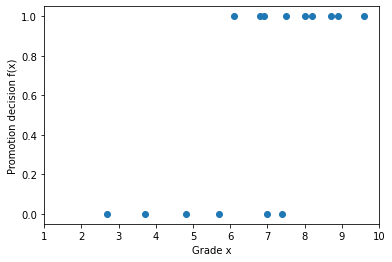

In [3]:
#The logistic regression functionality that we use later on requires the data to be a column vector
#If there are more than one variables, every one of them is represented by a column of x
x = np.array([2.7, 3.7, 4.8, 5.7, 6.1, 6.8, 6.9, 7.0, 7.4, 7.5, 8, 8.2, 8.7, 8.9, 9.6]).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,0,0,1,1,1,1,1,1])

#Let's plot the data
plt.scatter(x,y)
plt.xlim(1,10)
plt.xlabel('Grade x')
plt.ylabel('Promotion decision f(x)');

The idea of (single variate) logistic regression is to look for a function $f$ that has a <a href="https://en.wikipedia.org/wiki/Sigmoid_function">sigmoid curve</a>. That is, we look for a function $f$ of the form

$$
f(x) = \frac{1}{1 + e^{-p(x)}}
$$

with $p(x) = b_0 + b_1x$ an affine function. The goal is to 'learn' (or fit) the weights $b_0$ and $b_1$ from the historical data.

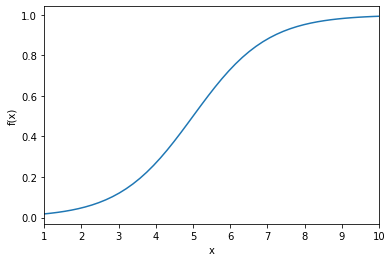

In [7]:
#An example of a sigmoid function for the univariate case
def sigmoid(x,b0,b1):
    return np.divide(1,1 + np.exp(-b0 - b1*x))

#Plot of the 'sigmoid curve'
x2 = np.linspace(1,10)
y2 = sigmoid(x2,-5,1)
plt.plot(x2,y2)
plt.xlim(1,10)
plt.xlabel('x')
plt.ylabel('f(x)');

We will next build a logistic regression model to fit the promotion data that we generated earlier on. We will need the following objects from `sklearn`.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

We next create a model instance of the class `LogisticRegression`. We use the 'newton-cg' solver here (and discuss another solver later on). We set `random_state` equal to $0$, in order to guarantee that we get the same output everytime (see Lecture 2 regarding choosing a random seed). You can also leave this argument out.

In [13]:
model = LogisticRegression(solver='newton-cg', random_state=0, max_iter=400)

Next, we can fit the data that we have using the `fit` method from the `LogisticRegression` class. 

In [14]:
model = model.fit(x,y)
print(model)

LogisticRegression(max_iter=400, random_state=0, solver='newton-cg')


We can now also a lot of information about the fitted model using methods from the `LogisticRegression` class.
- `classes_`: Number of classes that the observations come from (the number of distinct elements in y).
- `intercept_`: Coefficient $b_0$.
- `coef_`: Coefficient $b_1$. 
    - <i>More generally, it will return an array of coefficients $b_1,b_2,\dots$ if there are multiple variables.</i>
- `predict_proba()`: Array whose rows correspond to the observations, and whose columns to the classes. Entry $(i,j)$ is the probability that observation i gets label j.
- `predict()`: Gives predicted label of every observation. In the univariate case it simply returns $1$ if the  predicted probability > 0.5, and $0$ otherwise.
- `score()`: Computes the fraction of correctly classified observations.



In [15]:
#Number of classes that the observations come from (in our case {0,1})
print('Classes are {}'.format(model.classes_))

#Coefficients b0 and b1
b0 = model.intercept_
print('Coefficient b_0 = {}'.format(b0))
b1 = model.coef_[0]
print('Coefficient b_1 = {}'.format(b1))

#In univariate case second column is precisely x evaluated under the sigmoid function
print('The predicted probability of an observation i having label j is \n', model.predict_proba(x)) 
print(np.allclose(model.predict_proba(x)[:,1],sigmoid(x,b0,b1).T, atol=1e-4, rtol=1e-4))

x_predict = model.predict(x)
print('Predicted labels are:', x_predict)
print('Original labels are:', y)

correct_fraction = model.score(x,y)
print('Fraction of correctly predicted labels:', correct_fraction)

Classes are [0 1]
Coefficient b_0 = [-6.448636]
Coefficient b_1 = [1.017469]
The predicted probability of an observation i having label j is 
 [[0.975908 0.024092]
 [0.936076 0.063924]
 [0.827039 0.172961]
 [0.656799 0.343201]
 [0.560224 0.439776]
 [0.384579 0.615421]
 [0.360798 0.639202]
 [0.33768  0.66232 ]
 [0.253385 0.746615]
 [0.234624 0.765376]
 [0.155629 0.844371]
 [0.130719 0.869281]
 [0.082918 0.917082]
 [0.068699 0.931301]
 [0.034923 0.965077]]
True
Predicted labels are: [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Original labels are: [0 0 0 0 1 1 1 0 0 1 1 1 1 1 1]
Fraction of correctly predicted labels: 0.8


We also plot the sigmoid function $f(x)$ for the given $b_0$ and $b_1$.

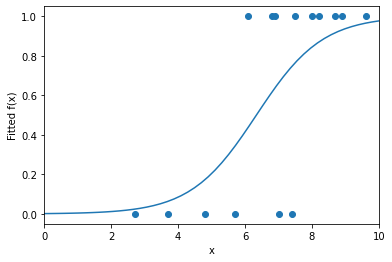

In [16]:
#Historical data
plt.scatter(x,y)
plt.xlim(1,10)
plt.xlabel('Grade x')
plt.ylabel('Promotion decision f(x)')

#Plot of the 'sigmoid curve'
x2 = np.linspace(0,10)
y2 = sigmoid(x2,b0,b1[0])
plt.plot(x2,y2)
plt.xlim(0,10)
plt.xlabel('x')
plt.ylabel('Fitted f(x)');

The confusion matrix of a logistic regression contains for every class how many observations were correctly/wrongfully classified. You could obtain these numbers yourself from the variables `y` and `x_predict` above.

In [17]:
cm = confusion_matrix(y, model.predict(x))
print(cm)

[[4 2]
 [1 8]]


Visualizing the confusion matrix in a heatmap can be done easily with Seaborn. Here `annot` determines whether or not the entries of the confusion matrix are displayed, and `cmap` defines the color scheme used. (You can also do this with Matplotlib, but that usually requires much more code.)

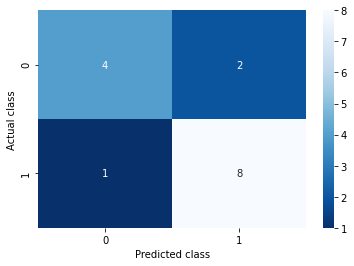

In [18]:
sns.heatmap(cm,annot=True,cmap='Blues_r')
plt.xlabel('Predicted class')
plt.ylabel('Actual class');

### Regularization <a name='regularization'></a>
'Overfitting' can be a serious problem, when trying to fit data to a given model. It means that the model is tuned too much to the data it is 'trained on'. This will have the consequence that the model fits the training data perfectly, but new (test) data generally can get classified poorly. In order to overcome the issue of overfitting, one can use <i>regularization</i> that penalizes overly complex models. In logistic regression, this usually comes down to the fact that the coefficients $b_0,b_1,\dots$ cannot be large (in absolute value). 

The amount of regularization can be controlled with the input paramter `C` when instantiating the model. Below we have plotted a number of fitted curves for given values of C. A higher value of C indicates less penalty for large coefficients $b_0,b_1,\dots$. For more info on regularization, we refer to the documentation of `sklearn`. Below we use the `liblinear` solver instead of the `newton-cg` solver. You can try different solvers yourself. Check out the documentation for more details.

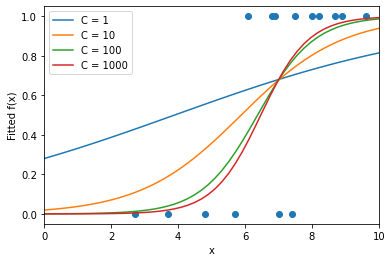

In [19]:
models = {}
for i in [1,10,100,1000]:
    models[i] = LogisticRegression(solver='liblinear', C = i, random_state=0, max_iter=200)

plt.scatter(x,y)
for j in models.keys():
    models[j] = models[j].fit(x,y)
    x1 = np.linspace(0,10)
    y1 = sigmoid(x1.T,models[j].intercept_,models[j].coef_[0])
    plt.plot(x1,y1,label='C = {}'.format(j))   
    
plt.xlim(0,10)
plt.xlabel('x')
plt.ylabel('Fitted f(x)')
plt.legend();

### Data splitting <a name="datasplitting"></a>
Usually the historical data that you want to fit is split into two parts: 
- Training set: Data used to fit the model.
- Testing set: Data used to check the performance of the fitted model.

In `sklearn` there is a function available to automatically split the data (uniformly at random) according to a specified fraction, indicating the size of the test set, using the `test_size` option. You can then fit the model with respect to the training set, and compare the predicted classes for the test set with the true classes of the test set.

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
print('Training set is: \n', np.vstack((x_train.T[0], y_train.T)))
print('Test set is: \n', np.vstack((x_test.T[0], y_test.T)))

Training set is: 
 [[7.5 9.6 6.1 4.8 8.9 8.  7.  8.2 5.7 2.7 6.8 8.7]
 [1.  1.  1.  0.  1.  1.  0.  1.  0.  0.  1.  1. ]]
Test set is: 
 [[3.7 6.9 7.4]
 [0.  1.  0. ]]


In [21]:
model = LogisticRegression(solver='liblinear', C = 100, random_state=0, max_iter=200)
model.fit(x_train,y_train)

print('True labels of the test set are: \n', y_test.T)
print('Predicted labels of the test set are: \n', model.predict(x_test))

True labels of the test set are: 
 [0 1 0]
Predicted labels of the test set are: 
 [0 1 1]


## Clustering <a name="clustering"></a>
Another fundamental problem in the area of machine learning and computer science is that of clustering. Here the task is to divide (unlabelled) data points $x_1,\dots,x_n \in \mathbb{R}^d$ into groups that are 'similar' in a certain sense. An example is customer segmentation, where you want to have a similar advertisement policy for similar customers (and so you need to decide how to segment the customers).

The high-level idea of many clustering algoritms is to come up with $k$ centers $c_1,\dots,c_k \in \mathbb{R}^d$, and assign every point $x_i$ to its closest center. The goal is to find the appropriate centers. The quality of a clustering $C$ with centers $c_1,\dots,c_k$, is the so-called <i>Sum of Squared Errors (SSE)</i>

$$
C(c_1,\dots,c_k) = \sum_{i=1}^n \min_{j=1,\dots,k} ||x_i - c_j||_2^2.
$$

which aggregates the distances of all data points to their closest center.

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

### Synthetic data generation <a name="datageneration"></a>
A convenient way to generate two-dimensional synthetic data (that will be clustered later on) is by using `make_blobs`. It has the following inputs:
- `n_samples`: The number of points/samples.
- `centers`: The number of clusters/centers that the data should represent.
- `cluster_std`: The standard deviation of the points in a given cluster from its center.
- `random_state`: Used to fix the randomness in the generation (akin the notion of random seed in Lecture 2).

It returns an array with all the data points, as well as an array with their labels.

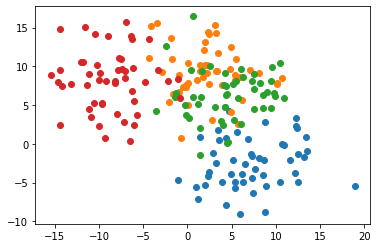

In [25]:
features, true_labels = make_blobs(
     n_samples=200,
     centers=4,
     cluster_std=3.5,
     random_state=32
)

#Plotting the different clusters
for label in np.unique(true_labels):
    mask = np.where(true_labels==label)
    plt.scatter(features[mask,0],features[mask,1])

### $k$-Means algorithm <a name="dataclustering"></a>
On a high-level, the <a href="https://en.wikipedia.org/wiki/K-means_clustering">(naive) $k$-means algorithm</a>, with initial centers $c_1,\dots,c_k$, does the following for $T$ iterations:
1. Assign every data point $x_i$ to its closest (in Euclidean distance) center $c_i$.
2. For $j = 1,\dots,k$, compute (new) center $\hat{c}_j$ of all data points assigned to center $c_j$. The resulting new centers $\hat{c}_1,\dots,\hat{c}_k$ are then used in step 1. of the next iteration, i.e., we set $c_j \leftarrow \hat{c}_j$.

We next create an instance of the `KMeans` class. The inputs of an instance are:
- `init`: This decides how the initial cluster centers are chosen. The option 'random' chooses them randomly from the list of data points. Alternatively, there is the option 'kmeans++' which speeds up the process (see the documentation). 
- `n_clusters`: Number of clusters/centers.
- `n_init`: The number of times the algorithm is run with different initial centers. The solution with lowest SSE is returned in the end.
- `max_iter`: The maximum number of iterations perform by the naive $k$-means algorithm. This is the parameter $T$ above. The algorithm acutally stops prematurely if no significant improvements are achieved in subsequent iterations.


In [26]:
kmeans = KMeans(
     init="random",
     n_clusters=4,
     n_init=10,
     max_iter=300,
     random_state=42
)

Next, we can run the algorithm on the synthetic data geneated earlier.

In [27]:
kmeans.fit(features)

KMeans(init='random', n_clusters=4, random_state=42)

There are now various methods that can be used to analyse the clustering that was found.

- `inertia_`: This gives the SSE of the run of the algorithm with lowest SSE (remember that we used `n_init` to specify how often to run the algorithm with random initial clusters).
- `cluster_centers_`: Gives the final cluster centers $c_1,\dots,c_k$.
- `labels_`: Specifies for every point the label/center it is assigned to it the final clustering.
- `n_iter_`: The number of iterations the algorithm performed (until no significant improvement in SSE is achieved).

In [28]:
sse = kmeans.inertia_
sse

3813.87595673624

In [29]:
centers = kmeans.cluster_centers_
centers

array([[ 6.85732 ,  6.34572 ],
       [ 6.589693, -2.898014],
       [ 0.154093,  9.41463 ],
       [-9.462002,  8.07409 ]])

In [30]:
labels = kmeans.labels_
labels

array([3, 0, 0, 3, 1, 3, 0, 1, 1, 3, 2, 0, 0, 2, 0, 1, 2, 3, 3, 1, 1, 0,
       1, 0, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 2, 1, 3, 1, 3, 3, 1, 3, 1,
       3, 2, 0, 1, 1, 0, 0, 3, 3, 0, 3, 2, 0, 0, 1, 3, 2, 0, 2, 3, 1, 1,
       2, 3, 2, 0, 0, 2, 2, 2, 0, 3, 2, 2, 1, 1, 3, 2, 0, 3, 0, 2, 0, 1,
       2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 2, 1,
       1, 2, 3, 1, 0, 1, 2, 2, 3, 2, 2, 1, 1, 3, 2, 3, 2, 0, 1, 1, 1, 0,
       2, 3, 1, 0, 0, 3, 2, 2, 2, 0, 3, 2, 3, 2, 0, 1, 0, 0, 0, 2, 1, 1,
       0, 2, 0, 2, 3, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 3, 0, 3, 2, 3, 2, 1,
       1, 1, 0, 0, 2, 1, 1, 3, 0, 0, 2, 0, 2, 3, 1, 0, 3, 3, 3, 0, 0, 2,
       0, 0])

In [31]:
kmeans.n_iter_

14

Below we have given a plot of the synthetic data, together with the cluster centers computes by the $k$-means algorithm.

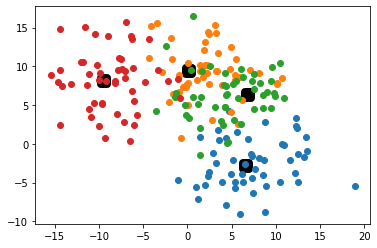

In [32]:
plt.scatter(centers[:,0],centers[:,1], marker='s', linewidth=8, color='black')
for label in np.unique(true_labels):
    mask = np.where(true_labels==label)
    plt.scatter(features[mask,0],features[mask,1])